# Import Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

# Load Data

In [60]:
df_train = pd.read_csv(r'C:\Users\dell\Desktop\ELEVVO INTERN\Loan Approval Prediction\Data Analysis & Visualization\train_data.csv')
df_test = pd.read_csv(r'C:\Users\dell\Desktop\ELEVVO INTERN\Loan Approval Prediction\Data Analysis & Visualization\test_data.csv')

In [61]:
df_train = df_train.drop(columns=['loan_id'])
df_test = df_test.drop(columns=['loan_id'])

In [62]:
df_train.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,5,Not Graduate,No,7900000,29900000,6,568,5800000,13900000,15900000,8700000,Approved
1,0,Not Graduate,Yes,9600000,34000000,12,710,23800000,10300000,38100000,7800000,Approved
2,1,Graduate,No,800000,2900000,8,682,2200000,1100000,2900000,700000,Approved
3,2,Graduate,Yes,4900000,13100000,18,754,8200000,3300000,16500000,7200000,Approved
4,5,Graduate,Yes,3000000,11100000,12,441,8500000,2500000,7300000,2000000,Rejected


In [63]:
X_train = df_train.drop(columns=['loan_status'])
y_train = df_train['loan_status']
X_test = df_test.drop(columns=['loan_status'])
y_test = df_test['loan_status']

# Handling Outliers

In [64]:
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

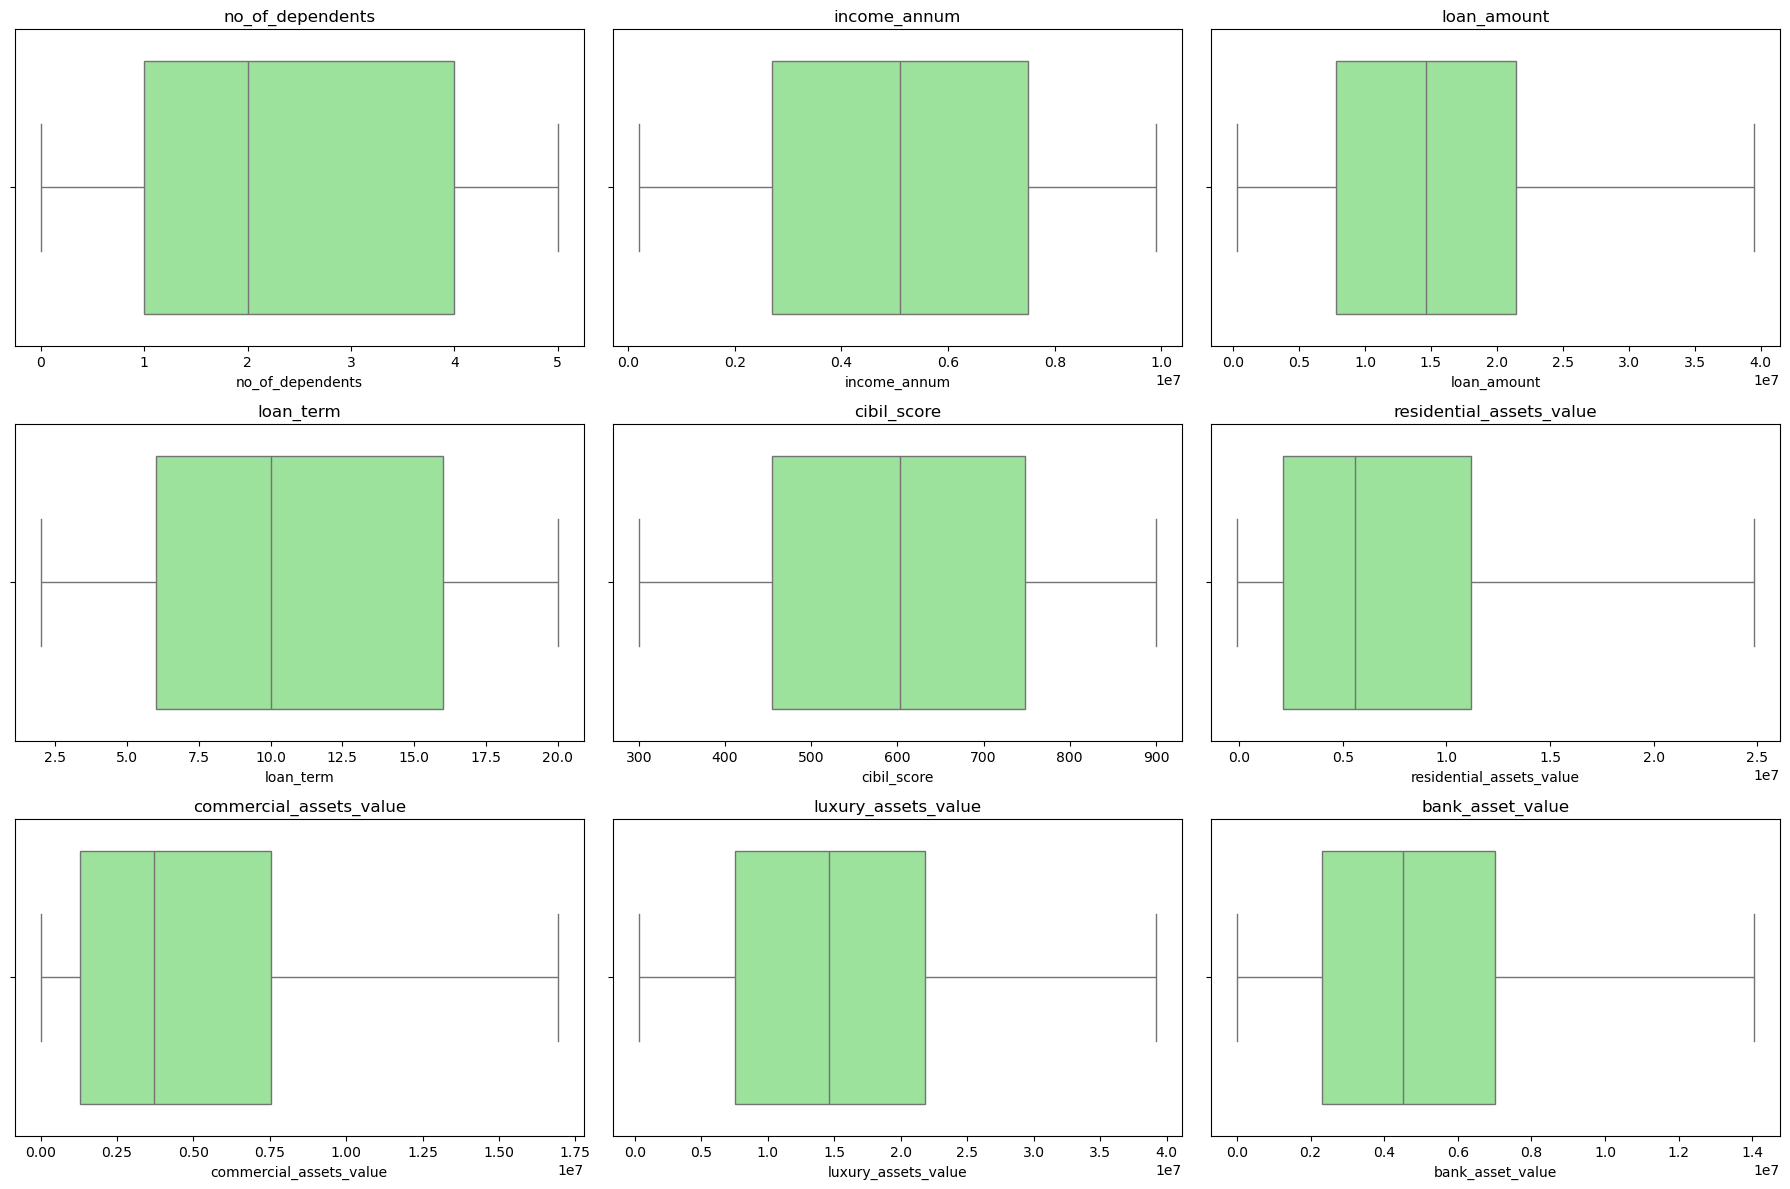

In [65]:
for col in num_cols:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values
    X_train[col] = np.where(X_train[col] < lower_bound, lower_bound,np.where(X_train[col] > upper_bound, upper_bound, X_train[col]))
    X_test[col] = np.where(X_test[col] < lower_bound, lower_bound,np.where(X_test[col] > upper_bound, upper_bound, X_test[col]))

# After handling outliers plot
n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(n_cols * 6, n_rows * 4))

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=X_train[col], color='lightgreen')
    plt.title(f'{col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# Encode Categorical Data

In [66]:
# Encode Categorical features
le = LabelEncoder()
for col in cat_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    
# Encode target 
le_target = LabelEncoder()
y_train = le_target.fit_transform(y_train)
y_test = le_target.transform(y_test)

# Feature Engineering

In [67]:
# loan to income ratio
X_train['loan_income_ratio'] = X_train['loan_amount'] / (X_train['income_annum'] + 1)
X_test['loan_income_ratio'] = X_test['loan_amount'] / (X_test['income_annum'] + 1)

# debt to income ratio
X_train['monthly_loan_payment'] = X_train['loan_amount'] / (X_train['loan_term'] * 12)
X_test['monthly_loan_payment'] = X_test['loan_amount'] / (X_test['loan_term'] * 12)

X_train['dti_ratio'] = X_train['monthly_loan_payment'] / (X_train['income_annum'] / 12)
X_test['dti_ratio'] = X_test['monthly_loan_payment'] / (X_test['income_annum'] / 12)

# Sum of all assets
X_train['total_assets_value'] = ( X_train['residential_assets_value'] + X_train['commercial_assets_value'] + X_train['luxury_assets_value'] + X_train['bank_asset_value'])
X_test['total_assets_value'] = ( X_test['residential_assets_value'] + X_test['commercial_assets_value'] + X_test['luxury_assets_value'] + X_test['bank_asset_value'])

# Asset to Loan ratio
X_train['asset_to_loan_ratio'] =    X_train['total_assets_value'] / (   X_train['loan_amount'] + 1)
X_test['asset_to_loan_ratio'] =    X_test['total_assets_value'] / (   X_test['loan_amount'] + 1)


# Smote to address Class Imbalance

In [68]:
import pandas as pd

print("Before SMOTE:")
print(pd.Series(y_train).value_counts())

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Before SMOTE:
0    2120
1    1295
Name: count, dtype: int64

After SMOTE:
0    2120
1    2120
Name: count, dtype: int64


# Load Preprocessed Data

In [69]:
df_preprocessed_train = pd.concat([X_train_resampled, pd.Series(y_train_resampled, name='loan_status')], axis=1)
df_preprocessed_test = pd.concat([X_test, pd.Series(y_test, name='loan_status')], axis=1)

df_preprocessed_train.to_csv(r'C:\Users\dell\Desktop\ELEVVO INTERN\Loan Approval Prediction\Data PreProcessing and Feature Engineering\preprocessed_train_data.csv', index=False)
df_preprocessed_test.to_csv(r'C:\Users\dell\Desktop\ELEVVO INTERN\Loan Approval Prediction\Data PreProcessing and Feature Engineering\preprocessed_test_data.csv', index=False)